In [1]:
import pandas as pd

In [198]:
data = pd.DataFrame({"Hours": [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14, 50],
                   "Score": [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89, 150]})
data

,Hours,Score
0,1,64
1,2,66
2,4,76
3,5,73
4,5,74
5,6,81
6,6,83
7,7,82
8,8,80
9,10,88


In [199]:
import matplotlib.pyplot as plt

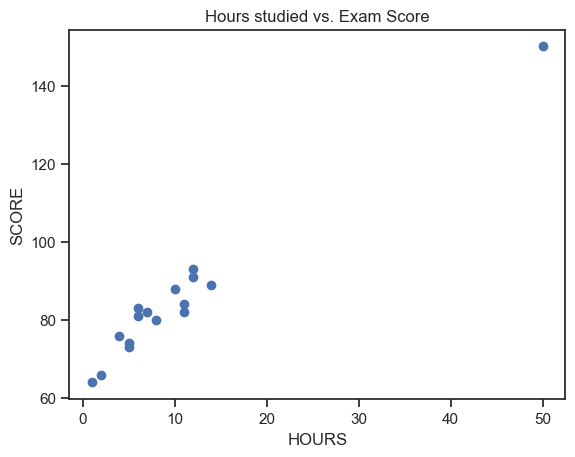

<AxesSubplot:>

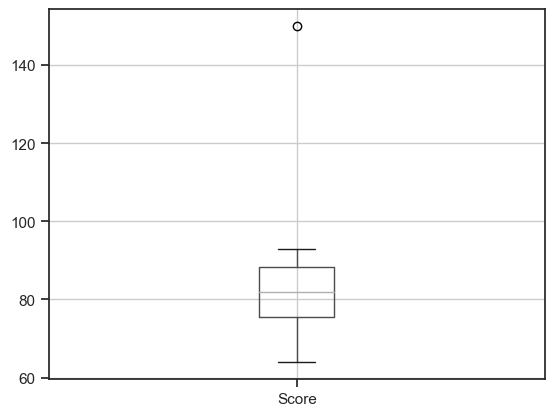

In [200]:
plt.scatter(data.Hours, data.Score)
plt.title("Hours studied vs. Exam Score")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.show()
data.boxplot(column=['Score'])

In [201]:
import statsmodels.api as sm

In [202]:
y = data["Score"] #define response variabale
x = data["Hours"] #define explanatary variables
x = sm.add_constant(x)#add constant to predictor variables
model = sm.OLS(y, x).fit() #fit linear regression model
print(model.summary()) #view model summary

                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     386.2
Date:                Sat, 26 Nov 2022   Prob (F-statistic):           1.36e-11
Time:                        15:41:50   Log-Likelihood:                -42.688
No. Observations:                  16   AIC:                             89.38
Df Residuals:                      14   BIC:                             90.92
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.5283      1.279     52.787      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [203]:
print("Linear Regression equation : ", str(model.conf_int()[0][0])+"+"+str(model.conf_int()[0][1])+"*Hours")

Linear Regression equation :  64.78456018901976+1.496795031171384*Hours


In [204]:
import scipy.stats as stats
import numpy as np

In [205]:
mean  = np.mean(data)
mean

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Hours    10.25
Score    84.75
dtype: float64

In [206]:
q3, q1 = np.quantile(data, [0.75, 0.25])
print("Quartile 1: ", q1)
print("Quartile 3: ", q3)

Quartile 1:  7.75
Quartile 3:  82.0


In [207]:
iqr = q3 - q1
print("Inter Quartile range : ", iqr)

Inter Quartile range :  74.25


In [208]:
z = stats.zscore(data)
z

,Hours,Score
0,-0.848615,-1.113017
1,-0.756873,-1.005738
2,-0.573388,-0.469344
3,-0.481646,-0.630262
4,-0.481646,-0.576623
5,-0.389904,-0.201148
6,-0.389904,-0.093869
7,-0.298162,-0.147508
8,-0.206420,-0.254787
9,-0.022936,0.174328


In [220]:
data_clean = data[(z<3)]
data_clean

,Hours,Score
0,1.0,64.0
1,2.0,66.0
2,4.0,76.0
3,5.0,73.0
4,5.0,74.0
5,6.0,81.0
6,6.0,83.0
7,7.0,82.0
8,8.0,80.0
9,10.0,88.0


In [215]:
df = data_clean.dropna()
df

,Hours,Score
0,1.0,64.0
1,2.0,66.0
2,4.0,76.0
3,5.0,73.0
4,5.0,74.0
5,6.0,81.0
6,6.0,83.0
7,7.0,82.0
8,8.0,80.0
9,10.0,88.0


In [216]:
import matplotlib.pyplot as plt

In [217]:
mean = np.mean(df)
mean

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Hours     7.6
Score    80.4
dtype: float64

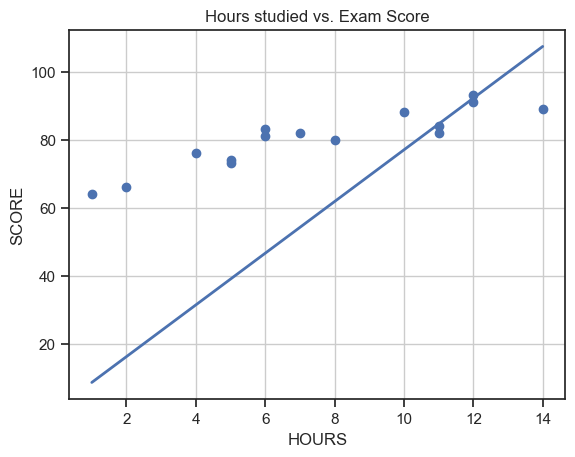

In [225]:
fig, ax = plt.subplots()
ax.scatter(df["Hours"], df["Score"])
x = df["Hours"]
y = (mean["Hours"]*x) + 1
ax.plot(x, y, linewidth=2.0)
plt.title("Hours studied vs. Exam Score")
plt.xlabel("HOURS")
plt.ylabel("SCORE")
plt.grid()
plt.show()